# ANALYSIS OF THE ADOPTION OF SOCIAL MEDIA (TWITTER) BY MINISTRIES DEPARTMENT AND AGENCIES

My notebook contains two sections.

Section 1 - Twitter Analysis with Python

Section 2 - Twitter Analysis with Excel


# Section 1 - Twitter Analysis with Python

Before we begin to analyze the twitter data, it's important to understand the structure of the tweet as well as pre-process the  data  to  remove  non-useful  terms  called  stop-words. Preprocessing  of  data  in  data  analysis  is  the  very  important step. Preprocessing is in the simple term means to take in the data and  prepare  the  data for optimal output considering our requirement.I got to understand my data using excel and did some data cleaning with python.

We have 51 MDAs Twitter handle.

In [1]:
# Importation & cleaning

import numpy as np
import pandas as pd
import re
import warnings

#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [4]:
#Visualisation

matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

%matplotlib inline

#Reading the csv file
tweets = pd.read_csv('mda.csv', encoding = "ISO-8859-1")

In [5]:
# Viewing the first tweet column
tweets['Tweet'][0]

'The Ag.DG presenting copy of the bpsr_ng compendium of public service to Eng. Muhammad Baba Kachila, who the Arewa House. https://t.co/0IZOs46jrJ'

You can see that in the first tweet we can find an URL, punctuations and a username of one tweetos (preceded by @). Before the data visualisation or the sentiment analysis it is necessary to clean the data. Delete the punctuations, the URLs, put the test in a lower case.

In [4]:
#Preprocessing del RT @blablabla:
tweets['tweetos'] = '' 

#add tweetos first part
for i in range(len(tweets['Tweet'])):
    try:
        tweets['tweetos'][i] = tweets['Tweet'].str.split(' ')[i][0]
    except AttributeError:    
        tweets['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(tweets['Tweet'])):
    if tweets['tweetos'].str.contains('@')[i]  == False:
        tweets['tweetos'][i] = 'other'
        
# remove URLs, RTs, and twitter handles
for i in range(len(tweets['Tweet'])):
    tweets['Tweet'][i] = " ".join([word for word in tweets['Tweet'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])

In [5]:
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: re.sub('  ', ' ', x))

Visualisation with WordCloud

we are going to focus on the kind of data visualisation “word cloud”. The visualisation are going to do with the column “Tweet”

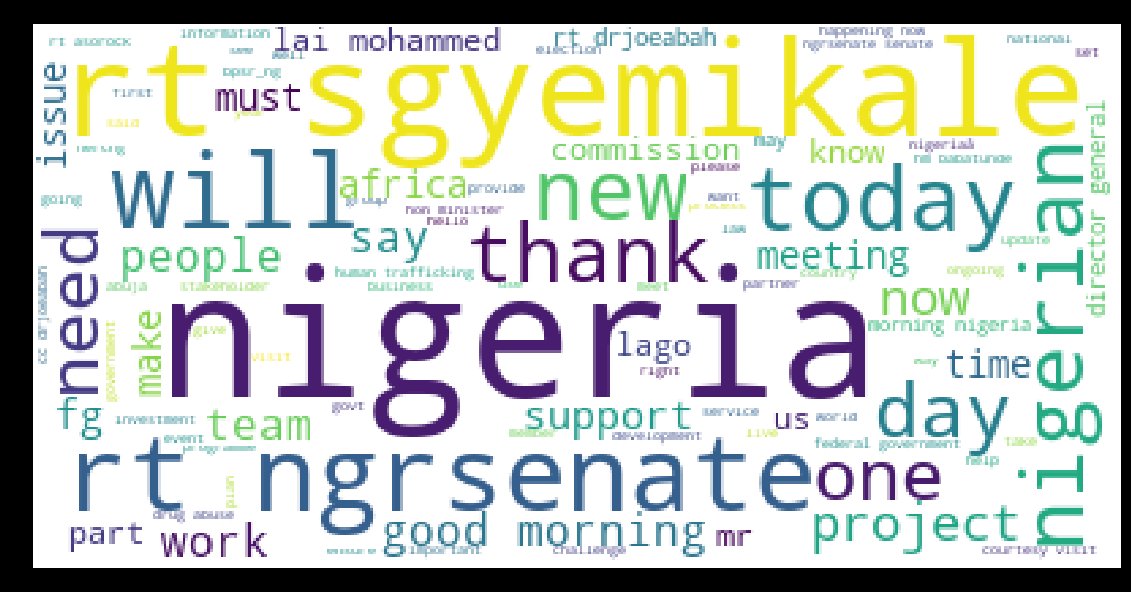

In [6]:
# Visualisation with WordCloud

def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Word Cloud Analysis")
wordcloud(tweets,'Tweet') 

Sentiment analysis.

The objective is to class by type the tweets. To distinguish 3 kinds of tweets according to their polarity score. which will include the positive tweets, the neutral tweets, and the negative tweets.

In [14]:
#Importation
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ibrahim\AppData\Roaming\nltk_data...


True

In [23]:
#Importation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
#Sentiment Analysis

tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in tweets['Tweet']]       
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(tweets['text_lem'].str.upper())
sid = SentimentIntensityAnalyzer()
tweets['sentiment_compound_polarity']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

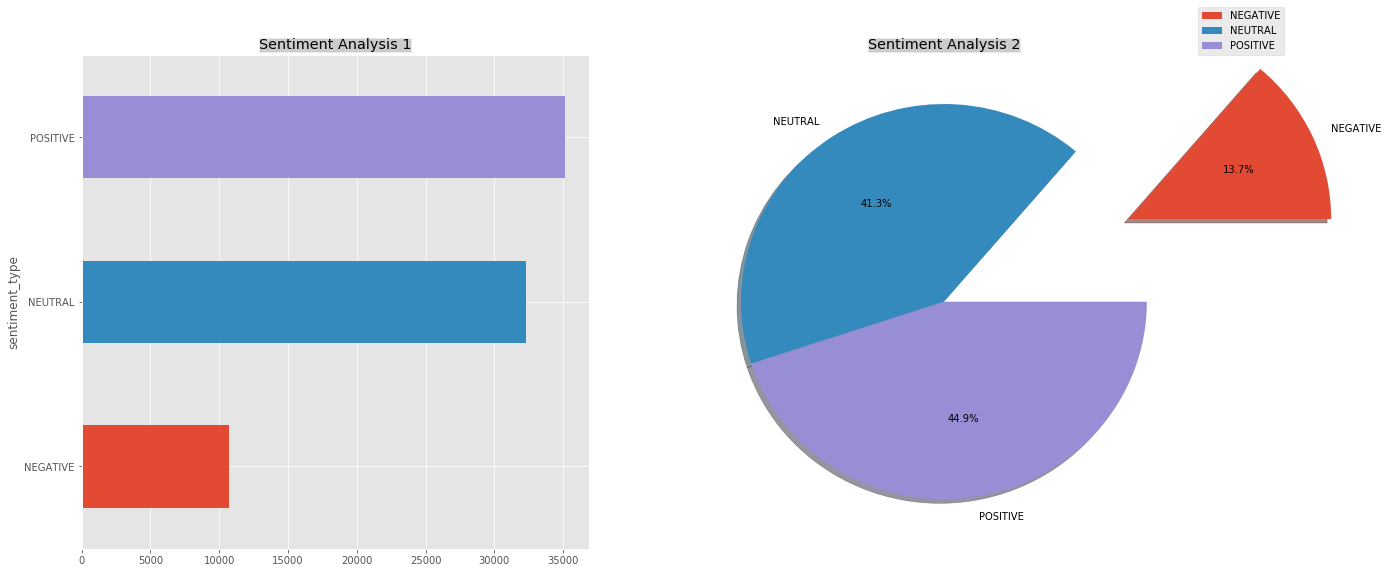

In [18]:
#Sentiment Analysis

tweets_sentiment = tweets.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets_sentiment.rename("",inplace=True)
explode = (1, 0, 0)
plt.subplot(221)
tweets_sentiment.transpose().plot(kind='barh',figsize=(20, 20))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
tweets_sentiment.plot(kind='pie',figsize=(20, 20),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

Now we are going to interest in the information of the localization: longitude and latitude. To display this information through a visualization i am going to use “Basemap”. Each red point corresponds to a location.
Even though we have lot of missing data in this two columns.

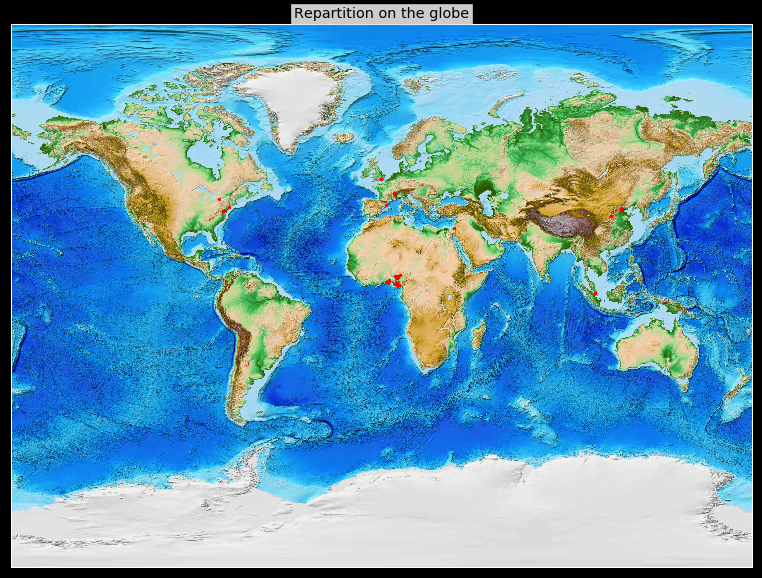

In [22]:
#Basemap visualization

plt.figure( figsize=(20,10), facecolor='k')
m = Basemap(projection='mill',resolution=None,llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180)
m.etopo()
xpt,ypt = m(np.array(tweets['Longitude']),np.array(tweets['Latitude']))
lon,lat = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,'ro',markersize=np.sqrt(5)) 
plt.title('Repartition on the globe', bbox={'facecolor':'0.8', 'pad':3})
plt.show()

# Section 2 - Twitter Analysis with Excel

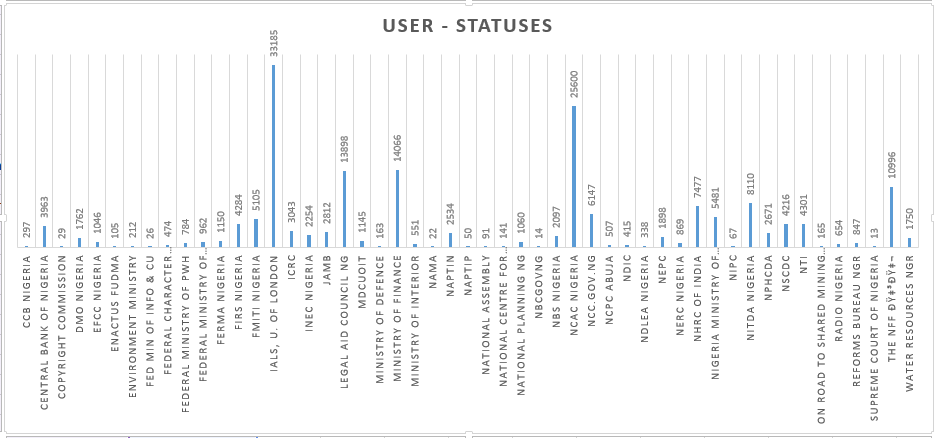

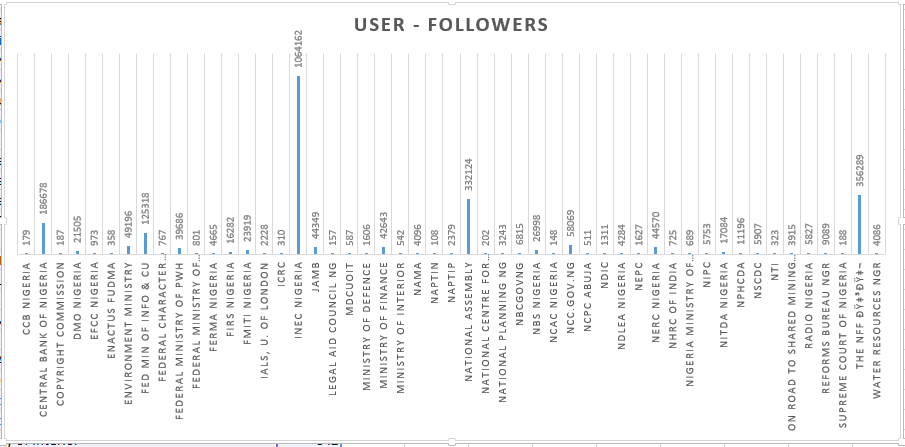

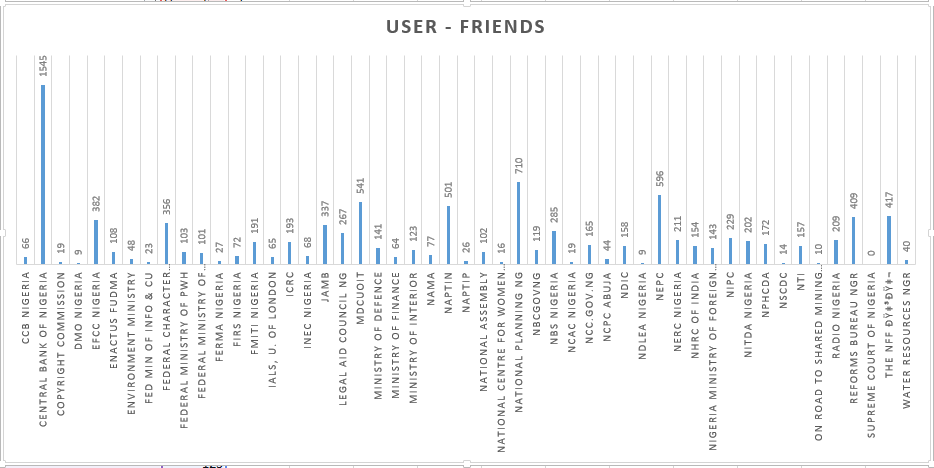

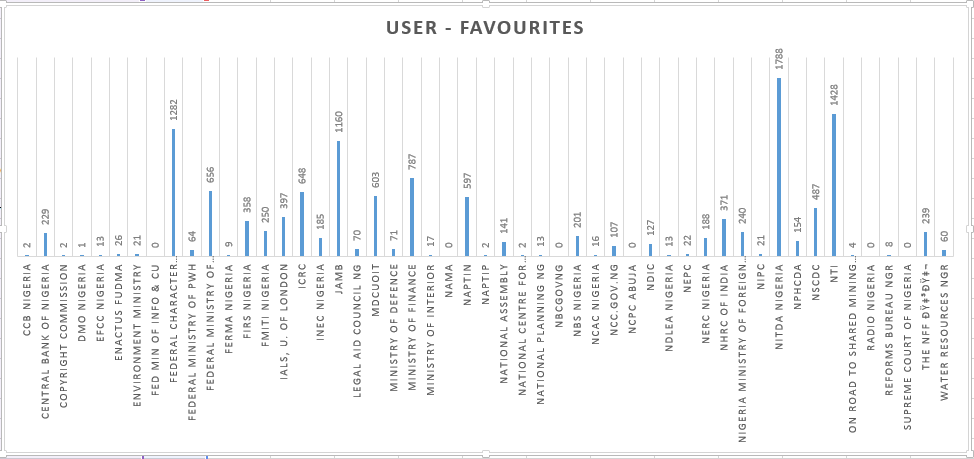

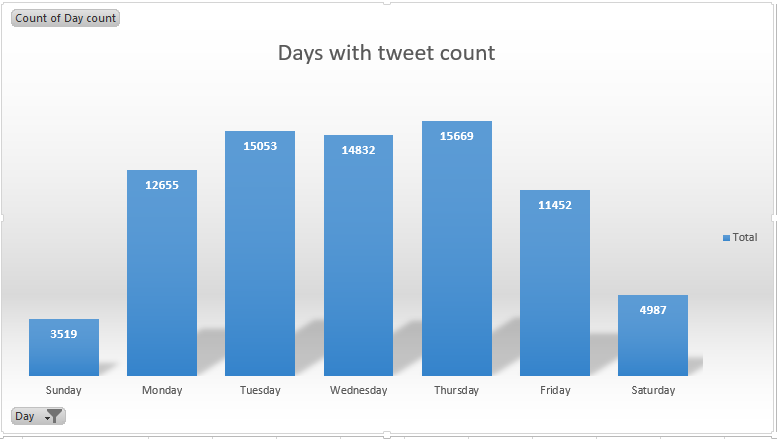

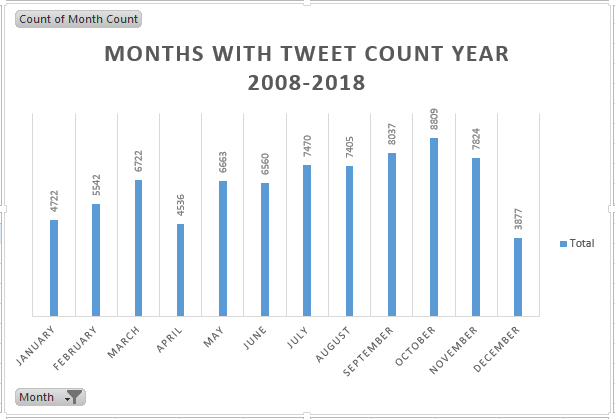